#########################################################################
# AAI-501
# Adam Graves
# Module 7: Final Project - Marketing Pay Per Click for FirstMedia.AI
#########################################################################
# Design

Using a dataset of 1009 rows of data about female and male internet time spent and Ad clicks as T,F (1,0) International data. (kaggle.com)
The goal is to determine if Ad Clicks are being used by internet surfers. This is very important in marketing strategies as this is a major expense in a business marketing plans i.e. Google Pay Per Click service. Each click on an Ad is a cost to a business deploying this service. Due to the high cost, there are business concerns as to the “worth” of such a service, and its Return On Investment.
For a business it is a very import to deploy Ad Clicks in their marketing campaign, but for a more established business that has a SEO presence, the question of the expensive Ad clicks or what is called Pay Per Click (PPC) becomes a legitimate question for the business.
This project will show the stakeholders the information about the percentages of Ad clicks as a general Internet activity by gender.
The strategy is for This project will look at several factors that will determine the activity of the Ad Clicks:
•	Determine the general percentage of “Clicked on Ad” (Ad Clicks) vs. general web activity
•	Determine the ratio of web usage between male vs. female
•	Determine the ratio of user Clicked on Ad between male vs. female, evaluate if there is a significant difference. This can help in determining on which campaigns it is worth utilizing Ad clicks.
•	Determine if on the Clicked on Ad = 1 if the Daily Internet was higher than the mean or not
•	Determine if on the Clicked on Ad = 1 the best Timestamp (Time of day)


## Step 1: ETL: Importing the Dataset which I have downloaded from Kaggle.com

advertising_ef.cv has 1009 rows:
Fields of the dataset:
1.	Daily Time Spent on Site: Use
2.	Age: Use
3.	Area Income: Not used
4.	Daily Internet Usage: Use
5.	Ad Topic Line: Use
6.	City: Use
7.	Gender: Use
8.	Country: Use
9.	Timestamp: Use – Need to separate date from time values.
10.	Clicked on Ad: Use as T,F (1,0)

After the import check/verify the success of import by viewing the file structure and a sample of data


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
import logging
# Import the complete marketing dataset
dfraw = pd.io.parsers.read_csv("./advertising_ef.csv")
cols_to_include = ['Country', 'Age', 'Daily Internet Usage',
                   'Gender','Daily Time Spent on Site',
                   'Clicked on Ad','Ad Topic Line']
df = dfraw[cols_to_include]
# View a snapshot of the data
df.info()
# Display the first 5 rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   996 non-null    object 
 1   Age                       998 non-null    float64
 2   Daily Internet Usage      1005 non-null   float64
 3   Gender                    1009 non-null   object 
 4   Daily Time Spent on Site  1005 non-null   float64
 5   Clicked on Ad             1009 non-null   int64  
 6   Ad Topic Line             1009 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 55.3+ KB


,Country,Age,Daily Internet Usage,Gender,Daily Time Spent on Site,Clicked on Ad,Ad Topic Line
0,Tunisia,35.0,256.09,Female,68.95,0,Cloned 5thgeneration orchestration
1,Nauru,31.0,193.77,Male,NaN,0,Monitored national standardization
2,San Marino,26.0,236.50,Female,69.47,0,Organic bottom-line service-desk
3,Italy,29.0,245.89,Male,74.15,0,Triple-buffered reciprocal time-frame
4,Iceland,35.0,225.58,Female,68.37,0,Robust logistical utilization


### Step 1.1: Organize the Dataframes
1. Create Dataframes by Dtype
2. Vecorize the Object fields

In [3]:
#Organize the different Dtypes
numeric_key_vars = ['Age','Daily Internet Usage','Daily Time Spent on Site','Gender','Clicked on Ad']
object_columns = ['Country','Ad Topic Line']
key_vars = ['Daily Time Spent on Site','Daily Internet Usage','Age','Gender','Clicked on Ad']

#Create dataframes with different Dtype
df_numeric = df[numeric_key_vars]
df_object = df[object_columns]

#Vectorize the Object fields
vect_object = CountVectorizer()
vectobject = vect_object.fit_transform(df_object)

### Step 1.2 Data Normalization Process: Clean up the Data

Find any Null values: Replace NA with the Mean for a better value
Arrange Data as needed
Drop unused Data fields

In [4]:
# Brief Data Snapshot before cleaning data to check for missing values
print("Missing Values Present:", df.isnull().values.any())
print("Sum of missing values: ", df.isnull().sum().sum())
print("Columns with NA: ", df.columns[df.isna().any()].tolist())

# Drop the data columns that are not relevant and display the snapshot of the new dataframe

df_mod = df.drop('Ad Topic Line',axis=1)
# Fill Null values of "Daily Time Spent on Site" with the Mean for a better value
df_mod["Daily Time Spent on Site"].fillna(df_mod["Daily Time Spent on Site"].mean(), inplace=True)

# Fill Null values of "Age" with the Mean for a better value
df_mod['Age'].fillna(df_mod["Age"].mean(), inplace=True)

# Fill Null values of "Daily Internet Usage" with the Mean for a better value
df_mod["Daily Internet Usage"].fillna(df_mod["Daily Internet Usage"].mean(), inplace=True)

# Fill Null values of "Country" with Ghost as Reference
df_mod["Country"].fillna("United States of America", inplace=True)

#Convert Country names to a numeric Code (UN Codes): For Extended International project if required. Currently not used
import country_converter as coco
import logging
cc = coco.CountryConverter()
some_countries = df['Country']
coco_logger = coco.logging.getLogger()
coco_logger.setLevel(logging.CRITICAL)
iso3_codes = cc.pandas_convert(series=some_countries, to='UNCode')

# Assign a numeric value to Gender Male=0, Female=1: Create a Booloean value
gender_col = df_mod['Gender']
gender_col.replace(to_replace = 'Male', value = 0, inplace=True)
gender_col.replace(to_replace = 'Female', value = 1, inplace=True)

#Creat a df1 without the 'Country' as a string
df1 = pd.DataFrame(df_mod, columns=['Age','Daily Internet Usage','Gender','Daily Time Spent on Site','Clicked on Ad'])
#Creat a df2 of the 'Country' UN Codes (Numeric): Future International Project
df2 = pd.DataFrame(iso3_codes, columns=['Country'])
#Creat a df3 that has the 'Country' as numeric
df3 = pd.concat([df1,df2],axis=1)


Missing Values Present: True
Sum of missing values:  32
Columns with NA:  ['Country', 'Age', 'Daily Internet Usage', 'Daily Time Spent on Site']


In [5]:
#Verify df3 structure
df_mod.head()
df3.head()

,Age,Daily Internet Usage,Gender,Daily Time Spent on Site,Clicked on Ad,Country
0,35.0,256.09,1,68.950000,0,788
1,31.0,193.77,0,65.009463,0,520
2,26.0,236.50,1,69.470000,0,674
3,29.0,245.89,0,74.150000,0,380
4,35.0,225.58,1,68.370000,0,352


## Step 2: Statistical Analysis and Visualization

Calculate the Statistical values, and print out Plots for visualization.
Note: No standarizing the values at this point due to a better report reading
1. Identify all Independent Variables (x): (By Order of importance)
        a. Gender
        b. Age
        c. Daily Time Spent on Site
        d. Daily Internet Usage
        e. Country
    The rest of the fields do not have an importance for this project
2. Identify the Dependent variable (y): Clicked on Ad
3. Check for correlation between all
4. Show plots to visualize relations
5. Show the values in printed reports

In [6]:
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
# Display the info and datatypes for the new dataframe

#Define the X values
X = df3[key_vars]
#Define the y values
y = df3[['Clicked on Ad']].values.ravel()
#y = df3[['Clicked on Ad']]
#print(y)

X.head()
X.describe(include='all')

# Display the shape of the independent variables (X)
print("Shape of df3: ", df3.shape)

# Convert categorical data to dummy variables for 'Country"
df_model = pd.get_dummies(df3, columns=['Country', 'Age','Daily Internet Usage','Gender','Daily Time Spent on Site','Clicked on Ad'])


Shape of df3:  (1009, 6)


### 2.1 Plots and Reports
Show calculated values in a plot for vuisualization
Show data in reports

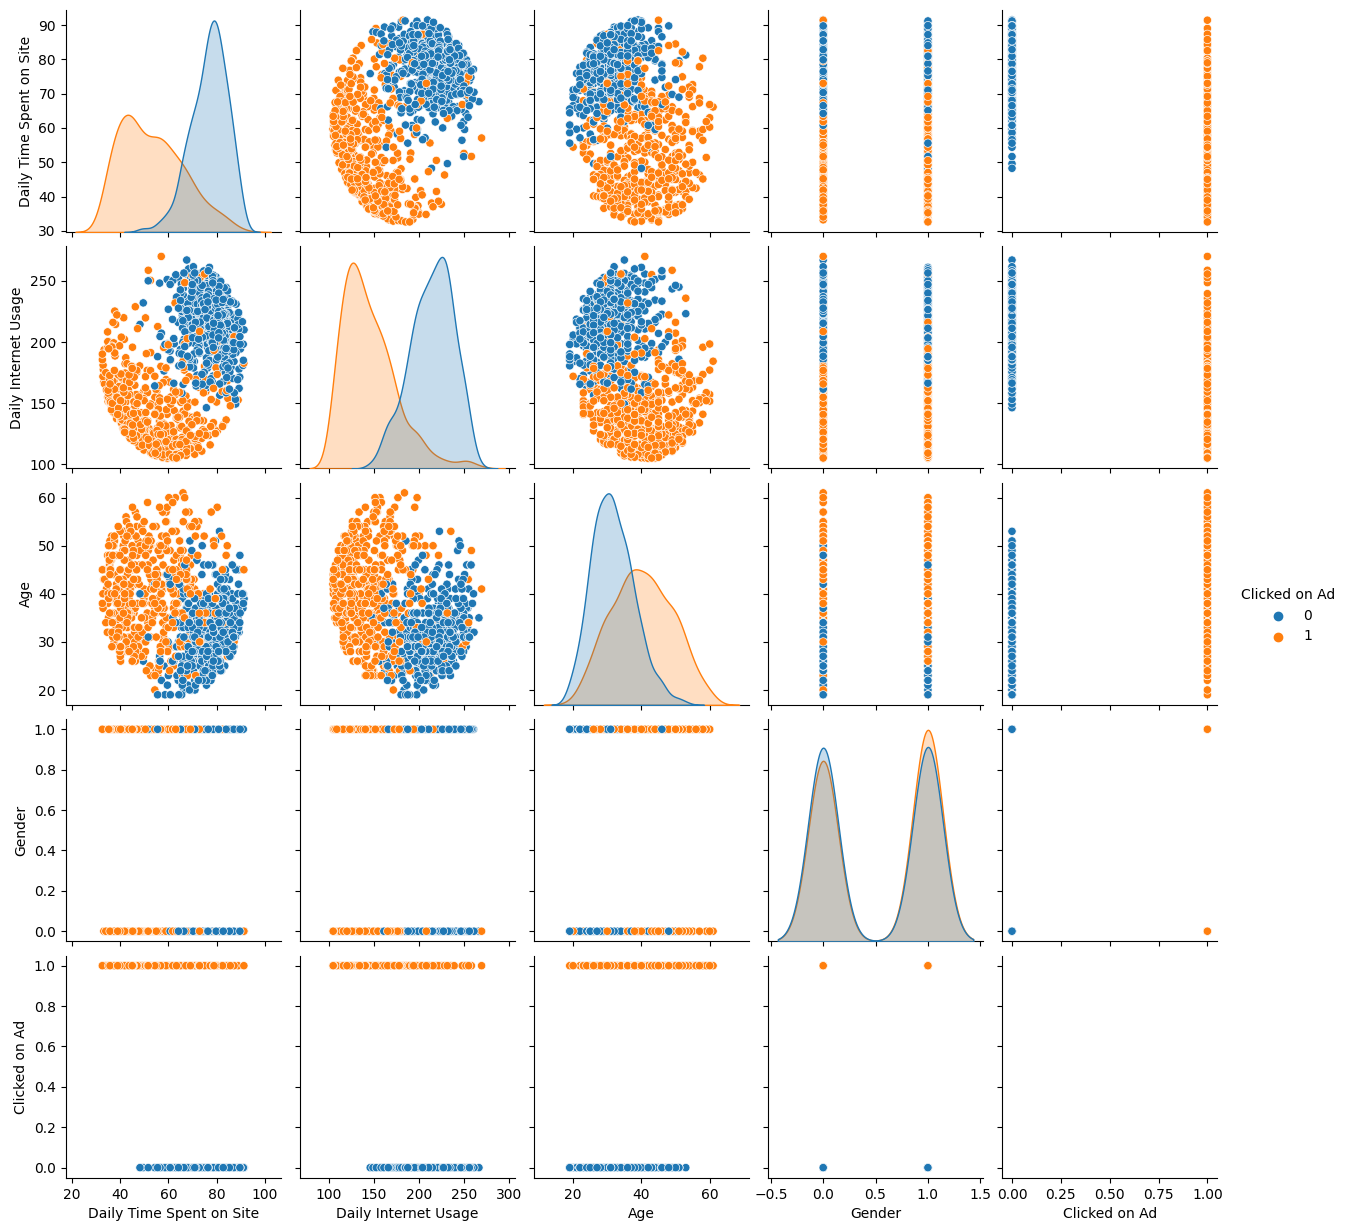

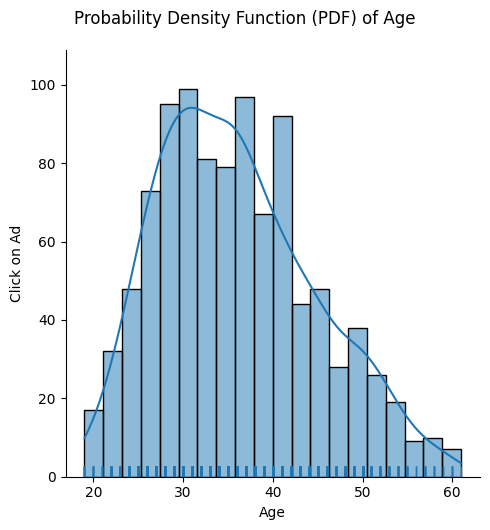

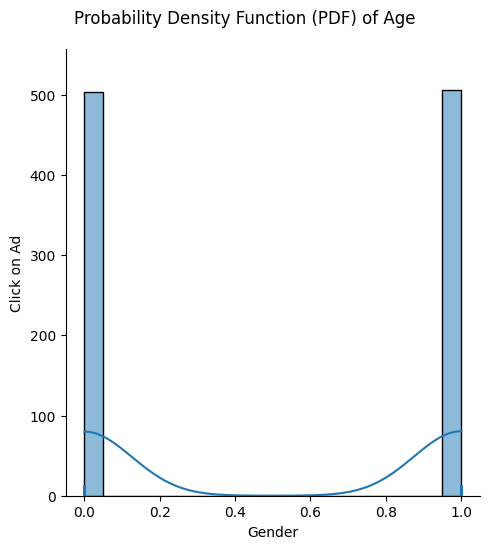

Count for Gender activity: Gender
0    484
1    525
dtype: int64
Count for Age activity: Age
19.000000     6
20.000000     6
21.000000     5
22.000000    13
23.000000    19
24.000000    21
25.000000    27
26.000000    40
27.000000    33
28.000000    48
29.000000    47
30.000000    39
31.000000    60
32.000000    38
33.000000    43
34.000000    40
35.000000    39
35.962926    11
36.000000    50
37.000000    36
38.000000    37
39.000000    30
40.000000    35
41.000000    31
42.000000    26
43.000000    23
44.000000    21
45.000000    30
46.000000    18
47.000000    12
48.000000    16
49.000000    18
50.000000    20
51.000000    12
52.000000    14
53.000000    10
54.000000     9
55.000000     7
56.000000     2
57.000000     6
58.000000     4
59.000000     2
60.000000     4
61.000000     1
dtype: int64


C:\Users\adamh\AppData\Local\Temp\ipykernel_5620\818008518.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfmean = df3.groupby('Clicked on Ad').mean()


,Age,Daily Internet Usage,Gender,Daily Time Spent on Site
Clicked on Ad,,,,
0,31.695457,214.560696,0.500994,76.813497
1,40.205094,145.727802,0.539526,53.275413


In [7]:
#sns.pairplot(df3, data=df_model)
sns.pairplot(df3, vars=['Daily Time Spent on Site','Daily Internet Usage','Age','Gender','Clicked on Ad'], hue='Clicked on Ad')
# Probability Density Function (PDF) of to show the distribution of the data by Age
sns.displot(df3.Age, kde=True, rug=True, bins=20).set(xlabel='Age', ylabel='Click on Ad').fig.suptitle('Probability Density Function (PDF) of Age').set_position([.5, 1.05])
plt.show()

# Probability Density Function (PDF) of to show the distribution of the data by Gender
sns.displot(y, kde=True, rug=True, bins=20).set(xlabel='Gender', ylabel='Click on Ad').fig.suptitle('Probability Density Function (PDF) of Age').set_position([.5, 1.05])
plt.show()

#Gender size on the dataset (Ratio)
print("Count for Gender activity:",df3.groupby('Gender').size())
#Age web surfer count
print("Count for Age activity:",df3.groupby('Age').size())

# compute the mean values of all by the "Clicked on Ads" (0,1)
dfmean = df3.groupby('Clicked on Ad').mean()
dfmean.head()


### 2.2 Results
1. Male spend more time on the Web surfing in general
2. Male spend more time on a website they are on
3. The average age of the Male is younger than the Female surfers:Male 20-30 the majority while Female 35-45
4. Age 31 has the highest count for web surfers
5. The web surfing activity is almost 50-50 between the genders: F:%52, M:%48
5. The Clicked on Ad is also close to 50-50:M:501 F:508
6. The mean age for users that clicked on the ad is: 40
7. The mean age of users that did not click on the ad is: 32
8. the mean of the Daily Time Spent on Site is higher on the users that did not click on the ad: 76.8 vs. 53.27 that is a 23 point increase which is a %43 increase
9. the mean of the Daily Internet Usage is higher on the users that did not click on the ad: 214.56 vs. 145.73 that is a 68.83 point increase which is a %47 increase

## Step 3: Prepare dataset for AI functions

Load new libraries
Set the Train and Test dataset as %75-%25
Vectorize the text fileds
Verify df shapes
Run a Ravel function to scale the y array

In [8]:
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
#Stadarize the dataset
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns, index = X.index)

# Split the data into training and testing sets trainer=%75, test=%25, repaets the same value for this section for each test
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)
vect_train = CountVectorizer()
xtrain = vect_train.fit_transform(x_train)
vect_test = CountVectorizer()
xtest = vect_test.fit_transform(x_test)
#show the shape of all x,y (Trainer) and x,y (Test)
#Start with trainer x,y
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
#now the test x,y
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

#Ravel function for converting 2D to 1D array
def column_or_1d(y, *, warn=False):
    y = np.asarray(y)
    shape = np.shape(y)
    if len(shape) == 1:
        return np.ravel(y)
    if len(shape) == 2 and shape[1] == 1:
        if warn:
            warnings.warn(
                "A column-vector y was passed when a 1d array was"
                " expected. Please change the shape of y to "
                "(n_samples, ), for example using ravel().",
                DataConversionWarning,
                stacklevel=2,
            )
        return np.ravel(y)

    raise ValueError(
        "y should be a 1d array, got an array of shape {} instead.".format(shape)
    )
y_test = column_or_1d(y_test)
y_train = column_or_1d(y_train)

x_train shape (756, 5)
y_train shape (756,)
x_test shape (253, 5)
y_test shape (253,)


## Step 4 Fit model for Regression
Load new libraries
Fit models
Score results

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
from scipy.special import exp10
from sklearn.metrics import median_absolute_error
# Set the Linear Regression Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
#model = make_pipeline(preprocessor, TransformedTargetRegressor(regressor=Ridge(alpha=1e-10), func=np.log10),)
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)

In [10]:
# Import Libraries for Analysis of MAE and MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [11]:
# Score the model on the testing data
model_score = lm.score(x_test, y_test).round(2)
print("Model Score (R Squared): ", model_score)

Model Score (R Squared):  1.0


In [12]:
# STATSMODELS Linear Regression Model to show the p-values of each feature
from statsmodels.api import OLS
import statsmodels.api as sm
X = sm.add_constant(X)
lin_model_results = OLS(y_test,x_test).fit()
lin_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.482
Model:                            OLS   Adj. R-squared (uncentered):              0.472
Method:                 Least Squares   F-statistic:                              46.23
Date:                Wed, 07 Dec 2022   Prob (F-statistic):                    1.22e-33
Time:                        10:01:30   Log-Likelihood:                         -182.37
No. Observations:                 253   AIC:                                      374.7
Df Residuals:                     248   BIC:                                      392.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0681      0.048     -1.419      0.157      -0.163       0.026
Daily Internet Usage        -0.0460      0.052     -0.892      0.373      -0.148       0.056
Age                          0.0187      0.037      0.502      0.616      -0.055       0.092
Gender                      -0.0223      0.032     -0.698      0.486      -0.085       0.041
Clicked on Ad                0.3840      0.069      5.578      0.000       0.248       0.520
==============================================================================
Omnibus:                       49.958   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.996
Skew:                           0.955   Prob(JB):                     2.15e-24
Kurtosis:                       5.586   Cond. No.                         4.36
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4.2 Scaled Scores
The above table shows all score with he scaled data
Below MSE and MAE

In [13]:
# Calculate the Mean Absolute Error (MAE) and Mean Squared Error (MSE)
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mse = mean_squared_error(y_pred, y_test)
lin_msre = np.sqrt(lin_mse)
print("Linear Regression RMSE: %.4f" % lin_msre)
print("Linear Regression MAE: %.4f" % lin_mae)
print("Linear Regression MSE: %.4f" % lin_mse)

Linear Regression RMSE: 0.0000
Linear Regression MAE: 0.0000
Linear Regression MSE: 0.0000


### 4.3 Linear Regression values on the df3 (Regular) dataset
Dataset rows: 1009
Mean Age: 35.96 (36)
25th Quantile Age: 29
Standard Deviation: 8.72
Margin of error: 0.54
%95 CI : (35.42, 36.50)


In [14]:
# Statistical Analysis of the Linear Regression Model Confidence Interval
confidence = 0.95 # 95% Confidence Interval
n = len(df3) # Number of observations
mean = df3['Age'].mean().round(2) # Mean of the data
quantile_25 = df3['Age'].quantile(0.25).round(2) # 25th Quantile of the data
t = stats.t.ppf((1 + confidence) / 2, n - 1) # t-statistic for 95% confidence
SD = df3['Age'].std().round(2) # Standard Deviation of the data
MOE = t * (SD / np.sqrt(n)) # Margin of Error

print("Size: ",n)
print("Mean Age: ", mean)
print("25th Quantile: ", quantile_25)
print("Standard Dev: ", SD)
print("Margin of Error: ", MOE.round(2))
print("95% Confidence Interval: ", (mean - MOE).round(2), "to", (mean + MOE).round(2))


Size:  1009
Mean Age:  35.96
25th Quantile:  29.0
Standard Dev:  8.72
Margin of Error:  0.54
95% Confidence Interval:  35.42 to 36.5


## Step 5: Prediction of the model
Fit models to predictions of selected random data, evaluate the results
List out misses of prediction vs actual from the test dataset


In [15]:
#clf1 - Vector Classification utilizing the rbf vecotr calc letting the auto gamma algo, and a mid size accuracy C
clf1 = svm.SVC(kernel='rbf', gamma='auto', C=50).fit(x_train,y_train)
#assign Y-prediction value to predictions1
predictions1 = clf1.predict(x_test)

In [16]:
score = 0
for i in range(len(y_test)): #Loop the y_test data
    if y_test[i] != predictions1[i]:
        score=score+1
        print(x_scaled.index[i],'is in:',y_test[i],"And was in Error Predicted as:",predictions1[i])
    else:
        exit()
print('100% Predictions matched:',[i],'record')
all_scores1 = [] #SVM


100% Predictions matched: [252] record


### 5.1 Run multiple prediction sets
The above test run shows no misses, 100% accuracy
Below will run 1000 times from the train and test set

In [17]:
from sklearn import metrics
from sklearn.metrics import classification_report
all_scores1 = [] #SVM
def test_predictions_clf_data(): #Making another def to defferntiate since we are adding the append of data
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25)
    y_test = column_or_1d(y_test)
    y_train = column_or_1d(y_train)
    clf1 = svm.SVC(kernel='rbf', gamma='auto', C=50).fit(x_train,y_train)
    predictions1t = clf1.predict(x_test) #Creating new var for these
    score1 = metrics.accuracy_score(predictions1t,y_test,normalize=True).__round__(4)
    all_scores1.append(score1) # Append to the data bins
#Run loop
i = 0
for i in range (0,1000):
    test_predictions_clf_data()
    i =+ 1


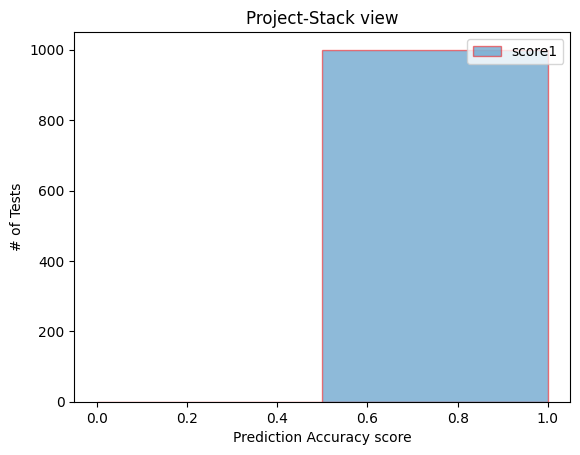

In [18]:
#Plot the Histogram-Stack View (Easy Read)
bins = [0.0,0.5,1]
plt.hist(all_scores1,bins=bins, alpha=0.5,label='score1',ec="red")

plt.xlabel("Prediction Accuracy score")
plt.ylabel("# of Tests")
plt.title("Project-Stack view")
plt.legend(loc='upper right')
plt.show()

The above plot show about a %50 accuracy from the 1000 time run.

## Step 6: Conclusions
1. Dataset rows: 1009
2. Male spend more time on the Web surfing in general
2. Male spend more time on a website they are on
3. The average age of the Male is younger than the Female surfers:Male 20-30 the majority while Female 35-45
4. Age 31 has the highest count for web surfers
5. The web surfing activity is almost 50-50 between the genders: F:%52, M:%48
5. The Clicked on Ad is also close to 50-50:M:501 F:508
6. The mean age for users that clicked on the ad is: 40
7. The mean age of users that did not click on the ad is: 32
8. the mean of the Daily Time Spent on Site is higher on the users that did not click on the ad: 76.8 vs. 53.27 that is a 23 point increase which is a %43 increase
9. the mean of the Daily Internet Usage is higher on the users that did not click on the ad: 214.56 vs. 145.73 that is a 68.83 point increase which is a %47 increase
10. Mean Age-General: 35.96 (36)
11. 25th Quantile Age: 29
12. Standard Deviation: 8.72
13. Margin of error: 0.54
14. %95 CI : (35.42, 36.50)
15. On a large scale of data the Test Predictions are >%50




